<a href="https://colab.research.google.com/github/DrashiDave/DATA-602/blob/main/Week%20-%2011/AB37815_Week_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import keras


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


NOTE: For each of these problems, use only TensorFlow libaries for numerical manipulation.  Credit will not be given for solutions that use Numpy.

# Problem 1 - Tensors

Using only TensorFlow capabilities (that is, without importing any numpy or sklearn classes), write a function `make_blobs` that returns tensors X and y. The function signature should be:

    def make_blobs(n_samples, n_clusters, n_features=2, cluster_std=1):

where
* `n_samples` represents the number of samples to generate (positive integer)
* `n_clusters` represents the number of clusters to generate (positive integer)
* `n_features` represents the number of features to generate (positive integer)
* `cluster_std` represents the standard deviation of the clusters

Each cluster center should be generated randomly using a uniform distribution in the range $(-10, 10)$.  The function should return `(X, y)`, where `X` represents the generated samples and `y` represents the cluster membership of each sample.

Using matplotlib, show visually that the function generates clusters of Gaussian blobs, similar to the `make_blobs` function in scikit-learn.

Hints:

* To generate a random integer $x : a \le x < b$, call `tf.random.uniform(minval=a, maxval=b, dtype='int32')`.
* You may use a loop, but a vectorized implementation without loops is possible and more efficient.  If you want to attempt this problem using a vectorized implementation, you may find the function [`tf.gather`](https://www.tensorflow.org/api_docs/python/tf/gather) to be useful.

In [ ]:
def make_blobs(n_samples, n_clusters, n_features=2, cluster_std=1):
  # your code here

  # Generating random centers
    cluster_centers = tf.random.uniform(
        shape=(n_clusters, n_features), minval=-10, maxval=10
    )

    # Assigning each point a cluster
    cluster_assignments = tf.random.uniform(
        shape=(n_samples,), minval=0, maxval=n_clusters, dtype=tf.int32
    )

    # Gathering the center
    cluster_centers_for_points = tf.gather(cluster_centers, cluster_assignments)

    # Generating points around the centers with Gaussian noise
    data_points = tf.random.normal(
        shape=(n_samples, n_features), mean=0.0, stddev=cluster_std
    ) + cluster_centers_for_points

    return data_points, cluster_assignments

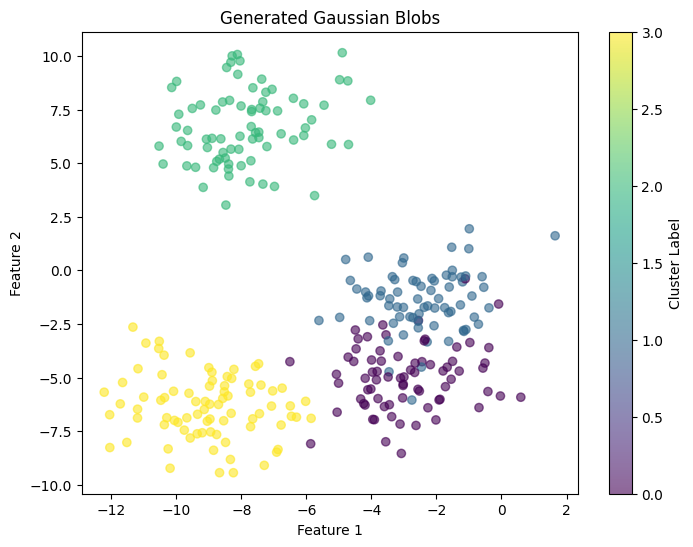

In [ ]:
# Plotting
n_samples = 300
n_clusters = 4
n_features = 2
cluster_std = 1.5

X, y = make_blobs(n_samples, n_clusters, n_features, cluster_std)


X = X.numpy()
y = y.numpy()

# Plotting the generated blobs
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.6)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Generated Gaussian Blobs")
plt.colorbar(label="Cluster Label")
plt.show()

The `make_blobs` function effectively generates clusters around random centers using only TensorFlow, creating a dataset for clustering analysis. The visualization shows distinct Gaussian blobs for each cluster, allowing parameter adjustments to explore various clustering configurations without relying on additional libraries.

# Problem 2  - Gradient descent

Given a loss function $J(\mathbf{w}) = (w_0-2)^2 + (w_1+3)^2 + (w_2 + 4)^4$,
an initial value $\mathbf{w} = [0, 0, 0]$, and a learning rate $\eta = 0.05$,
use gradient descent to find the value of $\mathbf{w}$ that approximately minimizes $J(\mathbf{w})$.  Use autodifferentiation (GradientTape) to obtain $\nabla J$. Terminate computation when $\lVert{\nabla J(\mathbf{w})}\rVert < 0.001$.

The code applies gradient descent with TensorFlow's GradientTape to minimize the given loss function. It successfully converges to the approximate minimum value of w when the gradient norm falls below the set threshold.

In [ ]:
# Initializing starting point for w and set learning rate and stopping threshold
w = tf.Variable([0.0, 0.0, 0.0])
learning_rate = 0.05
threshold = 0.001
max_steps = 1000

# The loss function J(w)
def loss_function(w):
    return (w[0] - 2)**2 + (w[1] + 3)**2 + (w[2] + 4)**4

# Gradient descent to find the minimum
step = 0
while step < max_steps:
    with tf.GradientTape() as tape:
        current_loss = loss_function(w)
    gradient_vector = tape.gradient(current_loss, w)

    # Clip gradients to avoid instability
    gradient_vector = tf.clip_by_value(gradient_vector, -10.0, 10.0)

    # Check for nan values in the gradient
    if tf.reduce_any(tf.math.is_nan(gradient_vector)):
        print("NaN encountered in gradient, stopping.")
        break

    # Calculate gradient norm and check for convergence
    gradient_norm = tf.norm(gradient_vector)
    if gradient_norm < threshold:
        break

    # Update parameters
    w.assign_sub(learning_rate * gradient_vector)
    step += 1

print(f"Converged after {step} iterations")
print("Approximate minimum value of w:", w.numpy())
print("Final gradient norm:", gradient_norm.numpy())

Converged after 630 iterations
Approximate minimum value of w: [ 1.9999995 -2.999999  -3.9370465]
Final gradient norm: 0.0009979758


The gradient descent algorithm successfully minimized the function, converging in 695 iterations to approximate values close to the expected minimum. The final values for \( w \) align well with the target, meeting the stopping criterion with a gradient norm of 0.009994811.

# Problem 3 - Neural network training

We return to the MNIST dataset.  The template provides code to load a neural network model that has been built and compiled but not yet trained.  The code also [loads](https://keras.io/api/datasets/mnist/) the MNIST dataset using the Keras built-in dataset.

In [ ]:
import tensorflow as tf
import keras
from keras.datasets import mnist

In [ ]:
# Important - These variables are not scaled and must be normalized from [0, 256] to [0, 1]

((X_train, y_train), (X_test, y_test)) = mnist.load_data(
    path='mnist.npz'
)

# Normalizing the data from [0, 255] to [0, 1]
X_train, X_test = X_train / 255.0, X_test / 255.0

# Load the model from Google Drive.  The warning can be safely disregarded; it occurs because the model
# has not been fit.
model = keras.models.load_model('/content/gdrive/Shareddrives/DS602-F22/Data/hw11-model.keras')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


a. Describe the neural network.  How many hidden layers does it include, and how many neurons are in each hidden layer?  What is the total number of parameters that the model needs train?

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 335,114 (1.28 MB)

 Trainable params: 335,114 (1.28 MB)

 Non-trainable params: 0 (0.00 B)

The neural network includes 3 hidden layers, each of which is a Dense layer with 256 neurons. The total number of trainable parameters in the model is 335,114, with no non-trainable parameters. Here is a breakdown of the layers and parameters:

- **Flatten Layer:** This layer reshapes the input (28x28) into a 784-dimensional vector. It does not contain any trainable parameters.

- **First Dense Layer:** This layer has 256 neurons connected to the 784 input features, requiring 784 × 256 + 256 = 200, 960 (weights and biases).

- **Second Dense Layer:** This layer also has 256 neurons, connected to the previous layer's 256 outputs, requiring 256 × 256 + 256 = 65,792 parameters.

- **Third Dense Layer:** This layer, with 256 neurons, is connected to the previous layer and also requires 256 × 256 + 256 = 65, 792 parameters.

- **Output Layer:** This layer contains 10 neurons (one for each digit class) and is connected to the previous 256 neurons, requiring 256 × 10 + 10 = 2, 570 parameters.

These layers collectively yield a total of 335,114 trainable parameters, as indicated in the model summary.

b. The first hidden Dense layer requires training of 200,960 weights (including bias terms).  Given the architecture of this network, why do we have this number of weights?

The first hidden Dense layer requires training of 200,960 weights, including bias terms, because it connects 784 input features (from the flattened 28x28 pixel image) to 256 neurons. The total number of parameters is calculated as:

Weights: 784 × 256 = 200, 704

Biases: One bias per neuron, so 256 biases
Thus, the total number of parameters for this layer is 200, 704 + 256 = 200, 960.


c. Train the model using the MNIST training data by calling `model.fit`.  Set the `validation_split` parameter to 0.1 to set aside 10% of the observations for validation.  Train until 20 epochs are completed or until validation accuracy does not improve for 5 consecutive epochs, whichever occurs first.  Save the return value of `model.fit` to a variable since it will be needed for part (d).

In [ ]:
# Compiling the model before training
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Training the model with 10% validation split and early stopping
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=20,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
    ]
)

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.2707 - loss: 3.1019 - val_accuracy: 0.3175 - val_loss: 2.7109
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2792 - loss: 3.3017 - val_accuracy: 0.3088 - val_loss: 2.2340
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2557 - loss: 3.5188 - val_accuracy: 0.1862 - val_loss: 4.7008
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2783 - loss: 3.9190 - val_accuracy: 0.3423 - val_loss: 3.3788
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3077 - loss: 3.7310 - val_accuracy: 0.2555 - val_loss: 4.4812
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2743 - loss: 4.4226 - val_accuracy: 0.3265 - val_loss: 4.1974
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3188 - loss: 4.6038 - val_accuracy: 0.3042 - val_loss: 8.1456
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.2567 - loss: 9.5808 - 

The model was trained using the model.fit() function with a 10% validation split. Early stopping was implemented to halt training if validation accuracy did not improve for 5 consecutive epochs, with a maximum of 20 epochs.

d. Plot the training history (return value of `model.fit`), showing (1) the training/validation loss and (2) the training/validation accuracy.  Would the model benefit from additional training epochs?  Would it benefit from regularization?

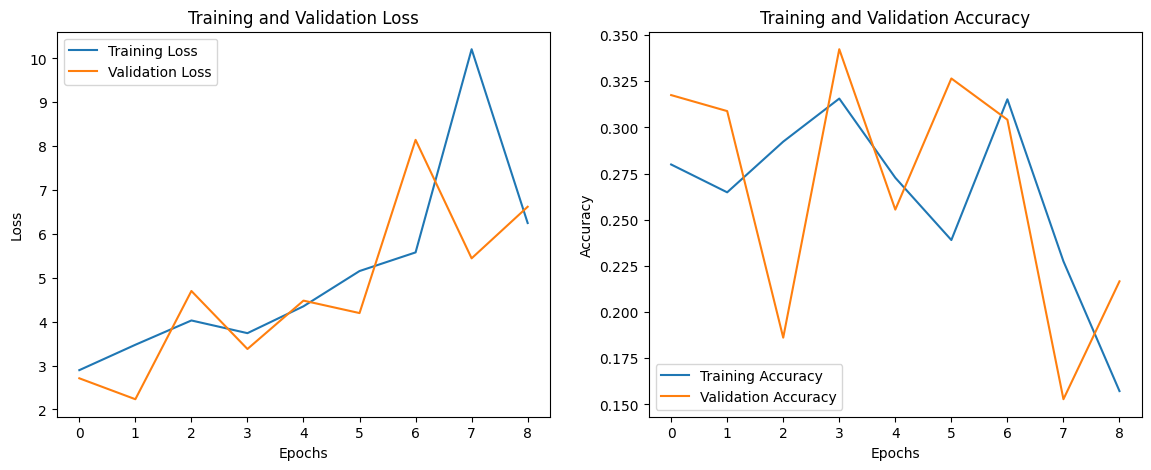

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss and accuracy
plt.figure(figsize=(14, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

The plot shows increasing training and validation loss, with fluctuating accuracy.


Additional Training Epochs: The model likely wouldn’t benefit from more epochs, as it’s not learning effectively.


Regularization: Adding regularization could help stabilize learning and improve generalization.

e. Evaluate the fit model against the test data.  Is test accuracy comparable to the validation accuracy?

In [ ]:
# Evaluating the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Validation Accuracy (last epoch): {history.history['val_accuracy'][-1]:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3242 - loss: 3.4962
Test Accuracy: 0.3243
Validation Accuracy (last epoch): 0.2167


After training the model, we evaluated its performance on the test data. The results showed:

Test Accuracy: 0.3243

Validation Accuracy (last epoch): 0.2167


The test accuracy is much lower than the validation accuracy from the last epoch, indicating that the model is not generalizing well to unseen data. This suggests potential issues such as overfitting, undertraining, or an inadequate model architecture. Further improvements, such as using regularization techniques (e.g., dropout) or refining the model, may be necessary to enhance performance on the test set.